In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
names = pd.read_csv('NationalNames.csv', sep =',', header=0, names = ['id', 'name', 'year', 'sex', 'births'])
names[:5]

,id,name,year,sex,births
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [48]:
names.shape

(1825433, 5)

In [ ]:
# 데이터 분석1 – 각 연도별, 성별(남/여)의 총 출생횟수 계산하기 –> 시각화  by 피벗테이블

In [8]:
total_births = names.pivot_table(values='births', index= 'year', columns = 'sex', aggfunc = 'sum')
total_births.head()

sex,F,M
year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


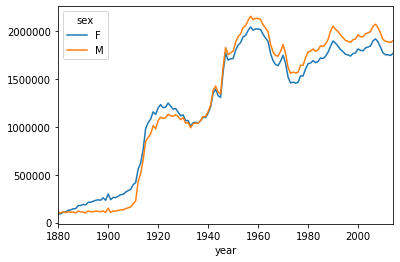

In [9]:
ax = total_births.plot()

In [49]:
ax.set_title('Total births by year and sex')

Text(0.5, 1, 'Total births by year and sex')

In [ ]:
# 데이터 분석2 – 각 (연도, 성별 기준의) 그룹내에서 , 각 이름(행)의 출생횟수가 전체에서 차지하는 비중(%)을 나타내는 열 추가하기 by groubpy()함수

In [23]:
grouped_names_dict = dict(list(names.groupby(['year', 'sex'])))

In [25]:
grouped_names_dict.keys()

dict_keys([(1880, 'F'), (1880, 'M'), (1881, 'F'), (1881, 'M'), (1882, 'F'), (1882, 'M'), (1883, 'F'), (1883, 'M'), (1884, 'F'), (1884, 'M'), (1885, 'F'), (1885, 'M'), (1886, 'F'), (1886, 'M'), (1887, 'F'), (1887, 'M'), (1888, 'F'), (1888, 'M'), (1889, 'F'), (1889, 'M'), (1890, 'F'), (1890, 'M'), (1891, 'F'), (1891, 'M'), (1892, 'F'), (1892, 'M'), (1893, 'F'), (1893, 'M'), (1894, 'F'), (1894, 'M'), (1895, 'F'), (1895, 'M'), (1896, 'F'), (1896, 'M'), (1897, 'F'), (1897, 'M'), (1898, 'F'), (1898, 'M'), (1899, 'F'), (1899, 'M'), (1900, 'F'), (1900, 'M'), (1901, 'F'), (1901, 'M'), (1902, 'F'), (1902, 'M'), (1903, 'F'), (1903, 'M'), (1904, 'F'), (1904, 'M'), (1905, 'F'), (1905, 'M'), (1906, 'F'), (1906, 'M'), (1907, 'F'), (1907, 'M'), (1908, 'F'), (1908, 'M'), (1909, 'F'), (1909, 'M'), (1910, 'F'), (1910, 'M'), (1911, 'F'), (1911, 'M'), (1912, 'F'), (1912, 'M'), (1913, 'F'), (1913, 'M'), (1914, 'F'), (1914, 'M'), (1915, 'F'), (1915, 'M'), (1916, 'F'), (1916, 'M'), (1917, 'F'), (1917, 'M'), (

In [27]:
grouped_sample = grouped_names_dict[(2011, 'M')]
grouped_sample.head(10)

,id,name,year,sex,births
1711173,1711174,Jacob,2011,M,20331
1711174,1711175,Mason,2011,M,19488
1711175,1711176,William,2011,M,17314
1711176,1711177,Jayden,2011,M,16954
1711177,1711178,Noah,2011,M,16838
1711178,1711179,Michael,2011,M,16744
1711179,1711180,Ethan,2011,M,16665
1711180,1711181,Alexander,2011,M,15681
1711181,1711182,Aiden,2011,M,15469
1711182,1711183,Daniel,2011,M,15249


In [28]:
def add_prop(agg_df):
    agg_births = agg_df['births']
    agg_df['prop'] = agg_births / agg_births.sum()
    return agg_df

In [50]:
names_with_prop = names.groupby(['year','sex']).apply(add_prop)
names_with_prop.head()

,id,name,year,sex,births,prop
0,1,Mary,1880,F,7065,0.077643
1,2,Anna,1880,F,2604,0.028618
2,3,Emma,1880,F,2003,0.022013
3,4,Elizabeth,1880,F,1939,0.021309
4,5,Minnie,1880,F,1746,0.019188


In [51]:
# 데이터 분석3 – 각 연도, 성별 그룹내에서,  출생횟수(births) 기준 TOP1000 이름 추출하기 by groupby()

In [52]:
names_with_prop.head()

,id,name,year,sex,births,prop
0,1,Mary,1880,F,7065,0.077643
1,2,Anna,1880,F,2604,0.028618
2,3,Emma,1880,F,2003,0.022013
3,4,Elizabeth,1880,F,1939,0.021309
4,5,Minnie,1880,F,1746,0.019188


In [35]:
grouped_names_with_prop_dict = dict(list(names_with_prop.groupby(['year', 'sex'])))
grouped_sample = grouped_names_with_prop_dict[(2011, 'M')]
grouped_sample.head()

,id,name,year,sex,births,prop
1711173,1711174,Jacob,2011,M,20331,0.010739
1711174,1711175,Mason,2011,M,19488,0.010294
1711175,1711176,William,2011,M,17314,0.009145
1711176,1711177,Jayden,2011,M,16954,0.008955
1711177,1711178,Noah,2011,M,16838,0.008894


In [36]:
grouped_sample.sort_values(by='births', ascending=False).iloc[:10]

,id,name,year,sex,births,prop
1711173,1711174,Jacob,2011,M,20331,0.010739
1711174,1711175,Mason,2011,M,19488,0.010294
1711175,1711176,William,2011,M,17314,0.009145
1711176,1711177,Jayden,2011,M,16954,0.008955
1711177,1711178,Noah,2011,M,16838,0.008894
1711178,1711179,Michael,2011,M,16744,0.008844
1711179,1711180,Ethan,2011,M,16665,0.008802
1711180,1711181,Alexander,2011,M,15681,0.008283
1711181,1711182,Aiden,2011,M,15469,0.008171
1711182,1711183,Daniel,2011,M,15249,0.008054


In [41]:
def get_top1000(agg_df):
    top1000_df = agg_df.sort_values(by='births', ascending=False).iloc[:1000]
    return top1000_df

In [43]:
top1000_names = names_with_prop.groupby(['year', 'sex']).apply(get_top1000)
top1000_names.head()

id       name  year sex  births      prop
year sex                                             
1880 F   0   1       Mary  1880   F    7065  0.077643
         1   2       Anna  1880   F    2604  0.028618
         2   3       Emma  1880   F    2003  0.022013
         3   4  Elizabeth  1880   F    1939  0.021309
         4   5     Minnie  1880   F    1746  0.019188

In [45]:
names_with_prop.loc[(names_with_prop['year'] == 2011) & (names_with_prop['sex'] == 'M')].shape

(14329, 6)

In [47]:
top1000_names.loc[(top1000_names['year'] == 2011) & (top1000_names['sex'] == 'M')].shape

(1000, 6)

In [53]:
# 데이터분석 4 – 각 연도에 따른, 성별의 전체 출생횟수 대비 TOP 1000이름들의 출생횟수 비중의 합 산출하기 by 피벗테이블

In [58]:
top1000_names.head()

id       name  year sex  births      prop
year sex                                             
1880 F   0   1       Mary  1880   F    7065  0.077643
         1   2       Anna  1880   F    2604  0.028618
         2   3       Emma  1880   F    2003  0.022013
         3   4  Elizabeth  1880   F    1939  0.021309
         4   5     Minnie  1880   F    1746  0.019188

In [64]:
top1000_names2 = top1000_names.drop(['year', 'sex'], axis=1)
top1000_names2.head()

id       name  births      prop
year sex                                   
1880 F   0   1       Mary    7065  0.077643
         1   2       Anna    2604  0.028618
         2   3       Emma    2003  0.022013
         3   4  Elizabeth    1939  0.021309
         4   5     Minnie    1746  0.019188

In [65]:
top1000_props = top1000_names2.pivot_table(values='prop', index = 'year', columns = 'sex', aggfunc = 'sum')
top1000_props.head(10)

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
1885,0.992251,0.995501
1886,0.989504,0.995035
1887,0.988279,0.996697
1888,0.984241,0.992429


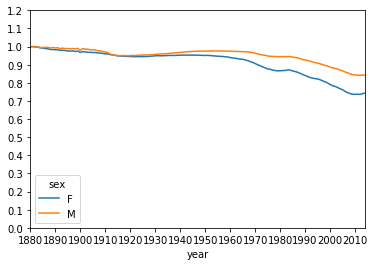

In [69]:
ax = top1000_props.plot()
ax.set_xticks(range(1880, 2020, 10))
ax.set_yticks(np.arange(0, 1.3, 0.1))

# refered by https://nittaku.tistory.com/142?category=725162